<a href="https://colab.research.google.com/github/ALK26/Projects/blob/master/Explore_New_York_Housing_Complaints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd  
df = pd.read_csv('https://cocl.us/311_NYC_Dataset') 
df.head() 

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   Unique Key              int64  
 2   Created Date            object 
 3   Closed Date             object 
 4   Complaint Type          object 
 5   Location Type           object 
 6   Incident Zip            float64
 7   Incident Address        object 
 8   Street Name             object 
 9   Address Type            object 
 10  City                    object 
 11  Status                  object 
 12  Resolution Description  object 
 13  Borough                 object 
 14  Latitude                float64
 15  Longitude               float64
dtypes: float64(3), int64(2), object(11)
memory usage: 734.8+ MB


In [ ]:
complaint = df["Complaint Type"].value_counts().to_frame()
complaint

,Complaint Type
HEAT/HOT WATER,1261574
HEATING,887850
PLUMBING,711130
GENERAL CONSTRUCTION,500863
UNSANITARY CONDITION,451643
PAINT - PLASTER,361257
PAINT/PLASTER,346438
ELECTRIC,307310
NONCONST,260890
DOOR/WINDOW,205278


In [ ]:
incident_zip = df["Incident Zip"].value_counts().to_frame()
incident_zip

,Incident Zip
11226.0,215709
10467.0,173911
10458.0,169485
10453.0,162532
10468.0,148213
...,...
10271.0,1
10279.0,1
11243.0,1
10045.0,1


In [ ]:
df["Borough"].value_counts().to_frame()


,Borough
BROOKLYN,1739886
BRONX,1617956
MANHATTAN,1055225
Unspecified,873221
QUEENS,645971
STATEN ISLAND,87584


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
most_area = df["Borough"].value_counts().to_frame()
most_area


,Borough
BROOKLYN,1739886
BRONX,1617956
MANHATTAN,1055225
Unspecified,873221
QUEENS,645971
STATEN ISLAND,87584


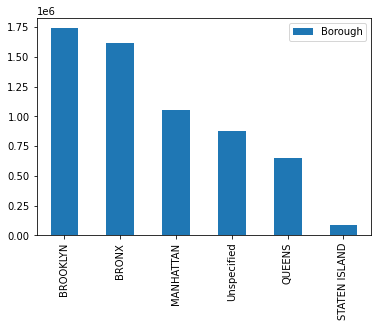

In [ ]:
most_area.plot(kind="bar")
#incident_zip
#complaint

In [ ]:
import pandas as pd 
import numpy as np 

! pip install seaborn
import matplotlib as mlp
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df.corr()

,Unnamed: 0,Unique Key,Incident Zip,Latitude,Longitude
Unnamed: 0,1.000000,0.788368,-0.025215,0.017559,-0.005945
Unique Key,0.788368,1.000000,-0.030457,0.024026,-0.004248
Incident Zip,-0.025215,-0.030457,1.000000,-0.737864,0.234013
Latitude,0.017559,0.024026,-0.737864,1.000000,0.305379
Longitude,-0.005945,-0.004248,0.234013,0.305379,1.000000


In [ ]:
new = df[["Complaint Type","Borough", "Incident Zip", "Unique Key"]] 
new.head()

,Complaint Type,Borough,Incident Zip,Unique Key
0,HEAT/HOT WATER,MANHATTAN,10019.0,45531130
1,UNSANITARY CONDITION,BROOKLYN,11204.0,45529784
2,HEAT/HOT WATER,QUEENS,11372.0,45527528
3,HEAT/HOT WATER,BRONX,10458.0,45530329
4,APPLIANCE,BROOKLYN,11209.0,45528814


In [ ]:
new.describe()

,Incident Zip,Unique Key
count,5.939146e+06,6.019843e+06
mean,1.074698e+04,2.956254e+07
std,5.130236e+02,7.909439e+06
min,1.000100e+04,1.562973e+07
25%,1.045200e+04,2.291225e+07
50%,1.046900e+04,2.931010e+07
75%,1.122300e+04,3.583163e+07
max,1.234500e+04,4.553204e+07


In [ ]:
new.head()

,Complaint Type,Borough,Incident Zip,Unique Key
0,HEAT/HOT WATER,MANHATTAN,10019.0,45531130
1,UNSANITARY CONDITION,BROOKLYN,11204.0,45529784
2,HEAT/HOT WATER,QUEENS,11372.0,45527528
3,HEAT/HOT WATER,BRONX,10458.0,45530329
4,APPLIANCE,BROOKLYN,11209.0,45528814


In [ ]:
 
missing_data = new.isnull() 
missing_data

,Complaint Type,Borough,Incident Zip,Unique Key
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
6019838,False,False,False,False
6019839,False,False,False,False
6019840,False,False,False,False
6019841,False,False,False,False


In [ ]:

for column in missing_data.columns.values.tolist(): 
    print(column) 
    print (missing_data[column].value_counts()) 
    print("")     
 

Complaint Type
False    6019843
Name: Complaint Type, dtype: int64

Borough
False    6019843
Name: Borough, dtype: int64

Incident Zip
False    5939146
True       80697
Name: Incident Zip, dtype: int64

Unique Key
False    6019843
Name: Unique Key, dtype: int64



In [ ]:
new["Complaint Type"].value_counts().to_frame()


,Complaint Type
HEAT/HOT WATER,1261574
HEATING,887850
PLUMBING,711130
GENERAL CONSTRUCTION,500863
UNSANITARY CONDITION,451643
PAINT - PLASTER,361257
PAINT/PLASTER,346438
ELECTRIC,307310
NONCONST,260890
DOOR/WINDOW,205278


In [ ]:
new["Complaint Type"].describe().to_frame()

,Complaint Type
count,6019843
unique,30
top,HEAT/HOT WATER
freq,1261574


In [ ]:
df["Street Name"].describe().to_frame()

,Street Name
count,5967018
unique,6825
top,GRAND CONCOURSE
freq,92450


In [ ]:
df.describe(include="all")

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
count,6.019843e+06,6.019843e+06,6019843,5893186,6019843,5967019,5.939146e+06,5967018,5967018,5935078,5939569,6019843,6012017,6019843,5.939172e+06,5.939172e+06
unique,NaN,NaN,1675132,757706,30,5,NaN,182600,6825,1,89,5,340,6,NaN,NaN
top,NaN,NaN,01/24/2013 12:00:00 AM,11/07/2012 12:00:00 AM,HEAT/HOT WATER,RESIDENTIAL BUILDING,NaN,34 ARDEN STREET,GRAND CONCOURSE,ADDRESS,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,BROOKLYN,NaN,NaN
freq,NaN,NaN,7581,7296,1261574,5959910,NaN,14298,92450,5935078,2026580,5886253,1698990,1739886,NaN,NaN
mean,3.009921e+06,2.956254e+07,NaN,NaN,NaN,NaN,1.074698e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.075424e+01,-7.391986e+01
std,1.737779e+06,7.909439e+06,NaN,NaN,NaN,NaN,5.130236e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.087877e-02,5.684804e-02
min,0.000000e+00,1.562973e+07,NaN,NaN,NaN,NaN,1.000100e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.049934e+01,-7.425312e+01
25%,1.504960e+06,2.291225e+07,NaN,NaN,NaN,NaN,1.045200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.067116e+01,-7.395200e+01
50%,3.009921e+06,2.931010e+07,NaN,NaN,NaN,NaN,1.046900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.075703e+01,-7.392248e+01
75%,4.514882e+06,3.583163e+07,NaN,NaN,NaN,NaN,1.122300e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.083958e+01,-7.389023e+01


In [ ]:
df["Borough"].value_counts().idxmax()

'BROOKLYN'

In [ ]:
df["Incident Address"].value_counts().idxmax()

'34 ARDEN STREET'

In [ ]:
df["Incident Zip"].value_counts().idxmax()

11226.0

In [ ]:
df["Borough"].value_counts().idxmin()

'STATEN ISLAND'

In [ ]:
df["Closed Date"].value_counts()

11/07/2012 12:00:00 AM    7296
12/09/2010 12:00:00 AM    6264
11/28/2011 12:00:00 AM    6005
01/06/2014 12:00:00 AM    5600
01/28/2013 12:00:00 AM    5598
                          ... 
01/17/2019 08:53:50 AM       1
12/17/2015 08:54:32 PM       1
04/02/2017 11:46:22 AM       1
03/29/2018 10:37:34 AM       1
08/21/2019 03:15:56 PM       1
Name: Closed Date, Length: 757706, dtype: int64

In [ ]:
df.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [ ]:
df.shape

(6019843, 16)

In [ ]:
df["Status"].value_counts().to_frame()

,Status
Closed,5886253
Open,133220
In Progress,364
Assigned,4
Pending,2


In [ ]:
df["Closed Date"].value_counts()

11/07/2012 12:00:00 AM    7296
12/09/2010 12:00:00 AM    6264
11/28/2011 12:00:00 AM    6005
01/06/2014 12:00:00 AM    5600
01/28/2013 12:00:00 AM    5598
                          ... 
01/17/2019 08:53:50 AM       1
12/17/2015 08:54:32 PM       1
04/02/2017 11:46:22 AM       1
03/29/2018 10:37:34 AM       1
08/21/2019 03:15:56 PM       1
Name: Closed Date, Length: 757706, dtype: int64

In [ ]:
df.dtypes

Unnamed: 0                  int64
Unique Key                  int64
Created Date               object
Closed Date                object
Complaint Type             object
Location Type              object
Incident Zip              float64
Incident Address           object
Street Name                object
Address Type               object
City                       object
Status                     object
Resolution Description     object
Borough                    object
Latitude                  float64
Longitude                 float64
dtype: object